## 2602052613
## UTS Deep learning soal 2

### Objective : Image classification using deep learning model with VGG-16 architecture
### Data challenges:
- variant image size
- blurry image
- border color
- noisess such as human arm, captions in the middle of the image
- different ratios of images

Penjelasan: https://binusianorg-my.sharepoint.com/personal/jovian_yanto_binus_ac_id/_layouts/15/guestaccess.aspx?share=Ebdj891ypmBJlUbAM81gVcwBPapd2xqCsUWImO50O48GPg&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=YAJfdx



In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2024-04-28 01:45:03.889705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 01:45:03.889808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 01:45:04.060072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/UTS deep learning/Dataset2A'

In [2]:
path = '/kaggle/input/gambar/Dataset2A'

In [3]:
os.listdir(path)

['acerola', 'apple', 'avocado', 'acai']

find folder as class

In [4]:
data = tf.keras.utils.image_dataset_from_directory(path, image_size=(224, 224))

Found 1600 files belonging to 4 classes.


In [55]:
tf.keras.utils.image_dataset_from_directory??

<function keras.src.utils.image_dataset_utils.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)>

In [5]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [6]:
batch = data_iterator.next()
print(len(batch))
batch[0].shape


2


(32, 224, 224, 3)

In [7]:
batch[1]

array([3, 3, 2, 2, 0, 1, 1, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3,
       0, 3, 3, 1, 2, 3, 3, 3, 1, 1], dtype=int32)

### Description:
- Class 0 = acai
- Class 1 = acerola
- Class 2 = apple
- Class 3 = avocado

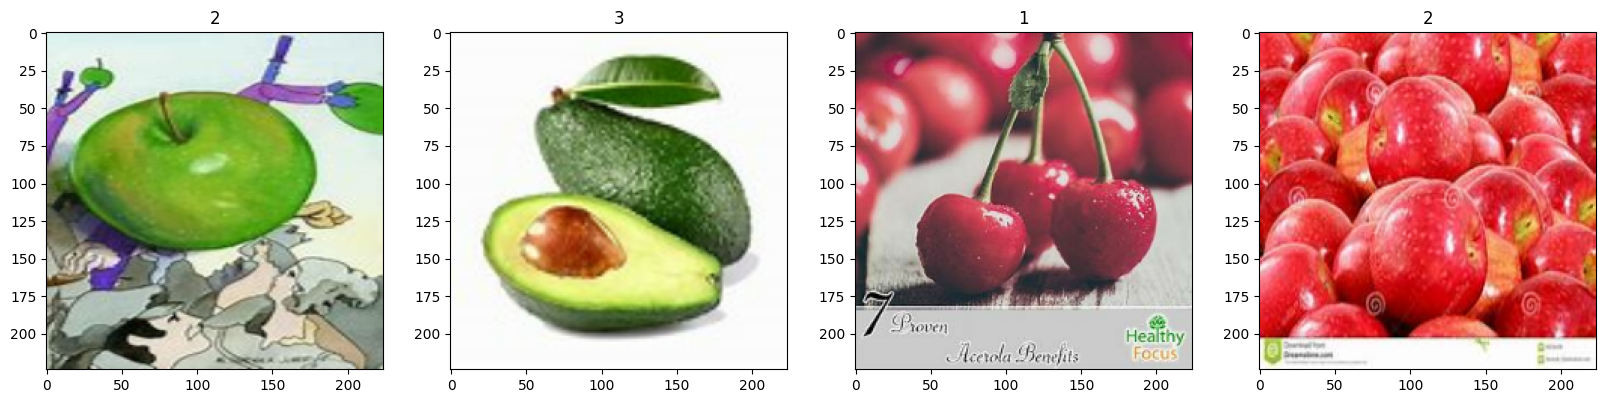

In [149]:
fig ,ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocessing

In [8]:
batch[0].max()

255.0

In [9]:
scaled = batch[0] / 255

In [10]:
print(scaled.max())
print(scaled.min())

1.0
0.0


Then we apply to original dataset

In [11]:
scaled_data = data.map(lambda x,y : (x/255, y))

In [ ]:
scaled_data.as_numpy_iterator().next()[0]

In [155]:
print(scaled_data.as_numpy_iterator().next()[0].min())
print(scaled_data.as_numpy_iterator().next()[0].max())

0.0
1.0


In [156]:
data_iterator = scaled_data.as_numpy_iterator()
batch = data_iterator.next()

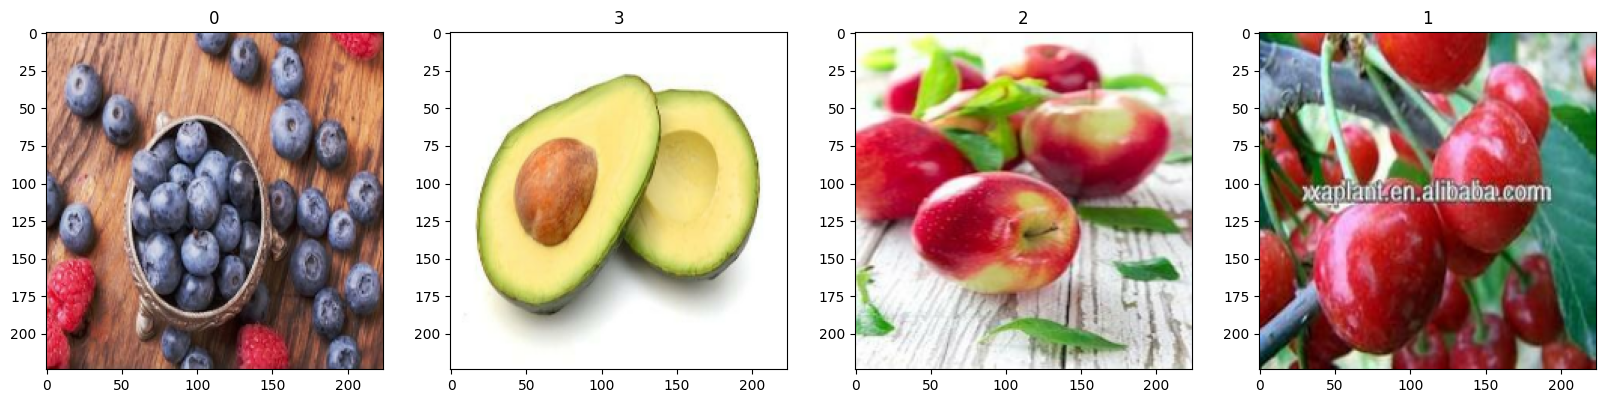

In [157]:
fig ,ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Split data

In [12]:
len(scaled_data)

50

In [13]:
shuffled_data = scaled_data.shuffle(buffer_size=len(scaled_data), seed=42)
shuffled_data

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
train_size = int(len(shuffled_data)*.8)
test_size = int(len(shuffled_data)*.1)
val_size = int(len(shuffled_data)*.1)

train = shuffled_data.take(train_size)
val = shuffled_data.skip(train_size).take(val_size)
test = shuffled_data.skip(train_size+val_size).take(test_size)

In [15]:
print(len(train))
len((test))

40


5

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()

# layer block 1
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# classifier
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

model.fit(train, epochs=10, validation_data=val, callbacks=[early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1714268888.685914     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714268888.710078     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.2517 - loss: 1.4722

W0000 00:00:1714268906.436598     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 495ms/step - accuracy: 0.2518 - loss: 1.4708 - val_accuracy: 0.2313 - val_loss: 1.3869
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 428ms/step - accuracy: 0.2692 - loss: 1.3862 - val_accuracy: 0.2438 - val_loss: 1.3870
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - accuracy: 0.2099 - loss: 1.3872 - val_accuracy: 0.2562 - val_loss: 1.3867
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 444ms/step - accuracy: 0.2605 - loss: 1.3862 - val_accuracy: 0.2250 - val_loss: 1.3870
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.2488 - loss: 1.3867 - val_accuracy: 0.3187 - val_loss: 1.3840
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 445ms/step - accuracy: 0.2655 - loss: 1.3859 - val_accuracy: 0.3000 - val_loss: 1.3846
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 441ms/step - accuracy: 0.2611 - loss: 1.3860 - val_accuracy: 0.2313 - val_loss: 1.3872
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/step - accuracy: 0.2483 - loss: 1.3866 - val_accuracy: 0.29

### Setelah trial error Optimizer adam tidak bagus untuk digunakan untuk kasus ini, epoch converge terlalu lama

In [167]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()

# layer block 1
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# classifier
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))


model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_169 (Conv2D)             │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_170 (Conv2D)             │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_171 (Conv2D)             │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_172 (Conv2D)             │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_173 (Conv2D)             │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_174 (Conv2D)             │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_175 (Conv2D)             │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_177 (Conv2D)             │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_178 (Conv2D)             │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_179 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_180 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_181 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

In [168]:
## Training
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

hist = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping])

Epoch 1/50


W0000 00:00:1714265678.331328     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2567 - loss: 1.3863

W0000 00:00:1714265696.189414     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.2566 - loss: 1.3863 - val_accuracy: 0.2750 - val_loss: 1.3852
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 466ms/step - accuracy: 0.2791 - loss: 1.3858 - val_accuracy: 0.4625 - val_loss: 1.3844
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 480ms/step - accuracy: 0.3367 - loss: 1.3847 - val_accuracy: 0.2625 - val_loss: 1.3838
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 486ms/step - accuracy: 0.2849 - loss: 1.3836 - val_accuracy: 0.3125 - val_loss: 1.3821
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - accuracy: 0.4079 - loss: 1.3817 - val_accuracy: 0.5437 - val_loss: 1.3774
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 468ms/step - accuracy: 0.4371 - loss: 1.3780 - val_accuracy: 0.5125 - val_loss: 1.3743
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - accuracy: 0.4597 - loss: 1.3719 - val_accuracy: 0.4750 - val_loss: 1.3684
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.4657 - loss: 1.3632 - val_accuracy: 0.531

In [169]:
# it seems that the model still can learn longer to imporve accuracy
# continuing from last best epoch with increased patience for early stopped for maximizing the model performance
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[early_stopping])

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.8417 - loss: 0.3866 - val_accuracy: 0.8250 - val_loss: 0.4144
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.8237 - loss: 0.4087 - val_accuracy: 0.8375 - val_loss: 0.3690
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - accuracy: 0.8589 - loss: 0.3525 - val_accuracy: 0.8438 - val_loss: 0.3519
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 453ms/step - accuracy: 0.8416 - loss: 0.3732 - val_accuracy: 0.8750 - val_loss: 0.3568
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 459ms/step - accuracy: 0.8831 - loss: 0.3289 - val_accuracy: 0.8750 - val_loss: 0.3984
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 471ms/step - accuracy: 0.8675 - loss: 0.3452 - val_accuracy: 0.9125 - val_loss: 0.2604
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 463ms/step - accuracy: 0.8856 - loss: 0.3161 - val_accuracy: 0.8938 - val_loss: 0.2695
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.8869 - loss: 0.3148 - val_accu

In [170]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
model.fit(train, epochs=30, validation_data=val, callbacks=[early_stopping])

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 486ms/step - accuracy: 0.9128 - loss: 0.2320 - val_accuracy: 0.9375 - val_loss: 0.2041
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.9135 - loss: 0.2267 - val_accuracy: 0.9000 - val_loss: 0.3761
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.9239 - loss: 0.2087 - val_accuracy: 0.9375 - val_loss: 0.1581
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 454ms/step - accuracy: 0.8689 - loss: 0.3935 - val_accuracy: 0.9438 - val_loss: 0.1742
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.9197 - loss: 0.2273 - val_accuracy: 0.9438 - val_loss: 0.1480
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 485ms/step - accuracy: 0.9414 - loss: 0.1823 - val_accuracy: 0.9500 - val_loss: 0.1263
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - accuracy: 0.9514 - loss: 0.1553 - val_accuracy: 0.9563 - val_loss: 0.1269
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.9322 - loss: 0.1949 - val_accu

In [21]:
hist.history

{'accuracy': [0.24609375,
  0.2593750059604645,
  0.2914062440395355,
  0.2953124940395355,
  0.38203126192092896,
  0.37812501192092896,
  0.4156250059604645,
  0.38671875,
  0.45703125,
  0.4140625,
  0.42890626192092896,
  0.3882812559604645,
  0.3812499940395355,
  0.453125,
  0.518750011920929,
  0.555468738079071,
  0.596875011920929,
  0.6499999761581421,
  0.684374988079071,
  0.7124999761581421,
  0.7203124761581421,
  0.7437499761581421,
  0.742968738079071,
  0.7734375,
  0.7445312738418579,
  0.7593749761581421,
  0.776562511920929,
  0.7757812738418579,
  0.801562488079071,
  0.7796875238418579],
 'loss': [1.386324167251587,
  1.386046290397644,
  1.3854050636291504,
  1.3848530054092407,
  1.3839080333709717,
  1.3824981451034546,
  1.3801977634429932,
  1.377756118774414,
  1.372741460800171,
  1.3655989170074463,
  1.351635217666626,
  1.3283120393753052,
  1.2887461185455322,
  1.2043373584747314,
  1.0621685981750488,
  1.0012931823730469,
  0.9121851921081543,
  0.82

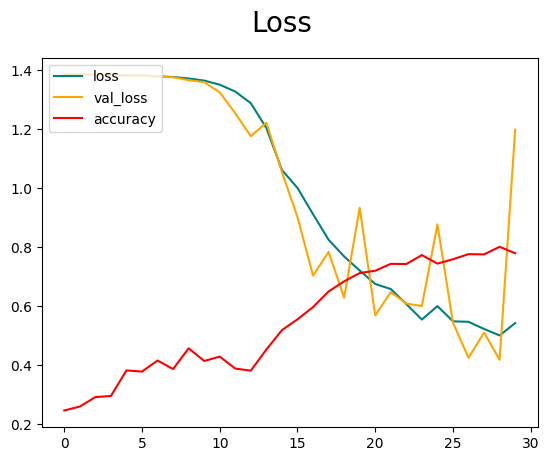

In [20]:
## **run without reruning the compiling again (only run once add epoch to 100 and without early stopping for best visualization)

fig = plt.figure()
plt.plot(histo.history['loss'], color='teal', label='loss')
plt.plot(histo.history['val_loss'], color='orange', label='val_loss')
plt.plot(histo.history['accuracy'], color='red', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [136]:
train_images = []
train_labels = []
for image_batch, label_batch in test:
    train_images.append(image_batch.numpy())
    train_labels.append(label_batch.numpy())

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

# Predict probabilities for each class
y_pred_probs = model.predict(train_images)

# Get predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(train_labels, y_pred)

# Calculate F1 score
f1 = f1_score(train_labels, y_pred, average='macro')  # Change average as per your requirement

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
Test Accuracy: 1.0
F1 Score: 1.0


In [138]:
val_images = []
val_labels = []
for image_batch, label_batch in val:
    val_images.append(image_batch.numpy())
    val_labels.append(label_batch.numpy())

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# Predict probabilities for each class
y_pred_probs = model.predict(val_images)

# Get predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(val_labels, y_pred)

# Calculate F1 score
f1 = f1_score(val_labels, y_pred, average='macro')  # Change average as per your requirement

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
Test Accuracy: 1.0
F1 Score: 1.0


In [133]:
test_images = []
test_labels = []
for image_batch, label_batch in test:
    test_images.append(image_batch.numpy())
    test_labels.append(label_batch.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict probabilities for each class
y_pred_probs = model.predict(test_images)

# Get predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)

# Calculate F1 score
f1 = f1_score(test_labels, y_pred, average='macro')  # Change average as per your requirement

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
Test Accuracy: 0.9875
F1 Score: 0.9861742424242425


## Param tuning

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout

model = Sequential()

# layer block 1
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# layer block 5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# classifier
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4, activation="softmax"))


model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


W0000 00:00:1714271561.890655     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.2441 - loss: 1.3933

W0000 00:00:1714271579.406756     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 485ms/step - accuracy: 0.2440 - loss: 1.3932 - val_accuracy: 0.2000 - val_loss: 1.3864
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - accuracy: 0.2518 - loss: 1.3874 - val_accuracy: 0.2313 - val_loss: 1.3851
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 441ms/step - accuracy: 0.2241 - loss: 1.3896 - val_accuracy: 0.2500 - val_loss: 1.3925
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 444ms/step - accuracy: 0.2694 - loss: 1.3875 - val_accuracy: 0.2313 - val_loss: 1.3957
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 460ms/step - accuracy: 0.2551 - loss: 1.3903 - val_accuracy: 0.2375 - val_loss: 1.3863
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.2852 - loss: 1.3875 - val_accuracy: 0.2562 - val_loss: 1.3843
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - accuracy: 0.2332 - loss: 1.3905 - val_accuracy: 0.2375 - val_loss: 1.3879
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.2307 - loss: 1.3892 - val_accuracy: 0.281

### Adding dropouts to add regulization and using RMSprop optimizer is still worse performing than unmodified model with SGD optimizer
- We can see that even after 10 epoch its not converging enough